In [1]:
import pandas as pd
import folium
import pandas as pd
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
yuco = pd.read_csv('data_cleaned/yuco.csv')
quinsy = pd.read_csv('data_cleaned/quinsy.csv')

In [3]:
path_yuco = []
step = 100
for lon, lat in zip(yuco['INX Longitude (�)'][::step], yuco['INX Latitude (�)'][::step]):
    path_yuco.append((lat, lon))

In [4]:
m = folium.Map(location=(quinsy['A-Frame_Extended Latitude'].mean(), quinsy['A-Frame_Extended Longitude'].mean()),
               zoom_start=15, control_scale = True)
folium.PolyLine(path_yuco, tooltip="YUCO").add_to(m)
for i, row in quinsy.iterrows():
    folium.Marker(
    location=[row['A-Frame_Extended Latitude'], row['A-Frame_Extended Longitude']],
    tooltip=row['[Mainline] Name'],
    #popup="Timberline Lodge",
    icon=folium.Icon(color="green"),
    ).add_to(m)

m

# CTD data

In [5]:
ctd_files = list(Path('data_cleaned/ctd/csv').glob('*.csv'))
ctd_dict = {}
for fn in ctd_files:
    ctd_name = fn.name.split('.')[0]
    ctd_dict[ctd_name] = pd.read_csv(fn, parse_dates=['datetime'])

In [6]:
for name, df in ctd_dict.items():
    plot_vars =  [
     'Temp [°C]',
     'SALIN [PSU]',
    # 'sat [%]',
     'DO_mg [mg/l]',
     'Chl_A [µg/l]',]
    fig, axs = plt.subplots(2,2, figsize=(10, 10))
    axs = axs.ravel()
    for i, var in enumerate(plot_vars):
        ax = axs[i]
        sub = df[df['Press [dbar]']>1][var]
        interquart = np.nanpercentile(sub, 75) -  np.nanpercentile(sub, 25)
        lims = [np.nanpercentile(sub, 1) - interquart * 0.1, np.nanpercentile(sub, 99) + interquart * 0.1]
        max_pressure_index = np.argmax(df['Press [dbar]'])
        df_down = df[df.index <= max_pressure_index]
        df_up = df[df.index > max_pressure_index]
        ax.scatter(df_down[var], df_down['Press [dbar]'], label=var + " downcast", s=1)
        ax.scatter(df_up[var], df_up['Press [dbar]'],label=var + " upcast", s=1)
        ax.invert_yaxis()
        ax.set(xlim=lims)
        ax.legend()
    axs[0].set(ylabel="pressure (dbar)")
    axs[2].set(ylabel="pressure (dbar)")
    fig.suptitle(name)
    fig.savefig(f'figures/ctd/profiles/{name}.png')
    plt.close('all')

In [7]:
ds = xr.open_dataset('data_cleaned/ctd/nc/ctd_gridded.nc')

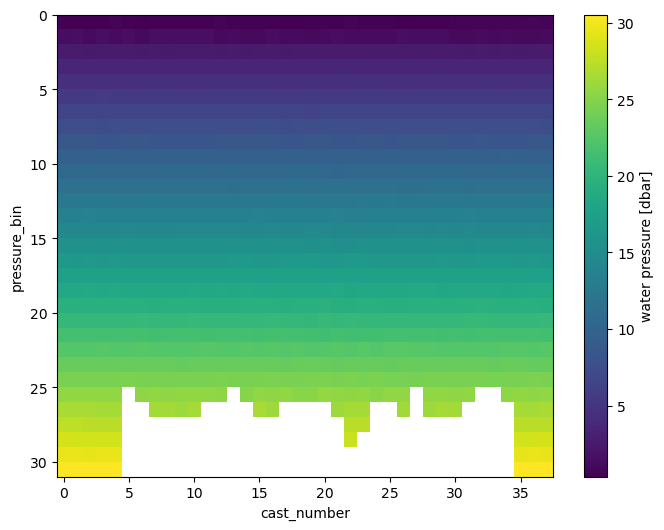

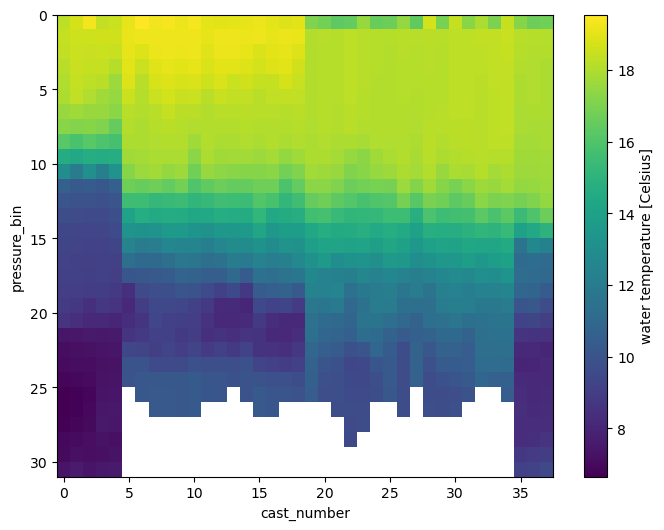

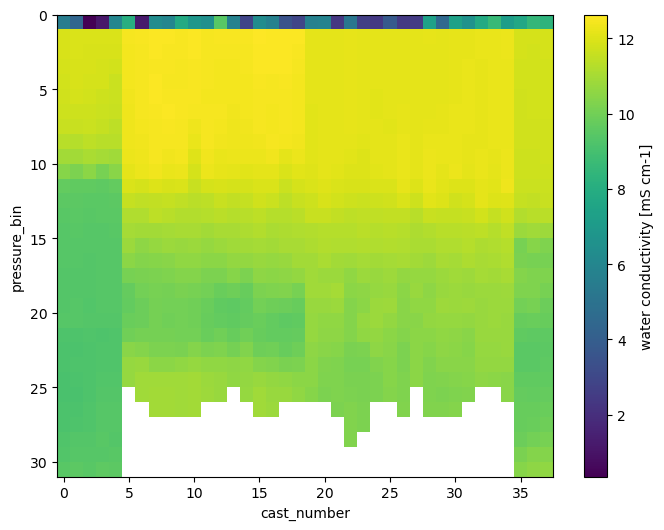

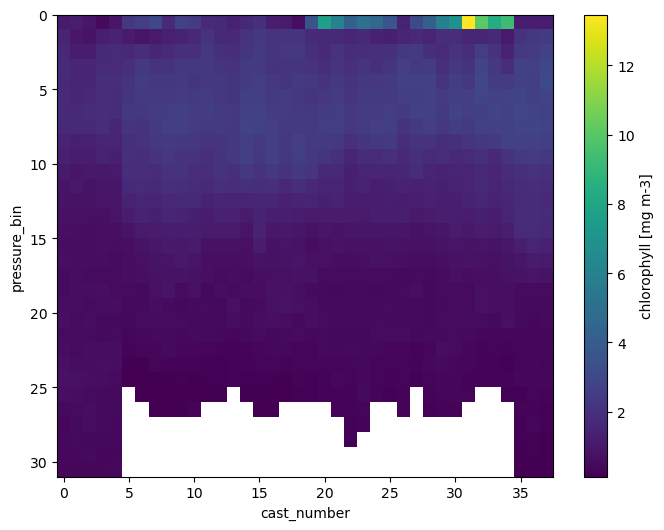

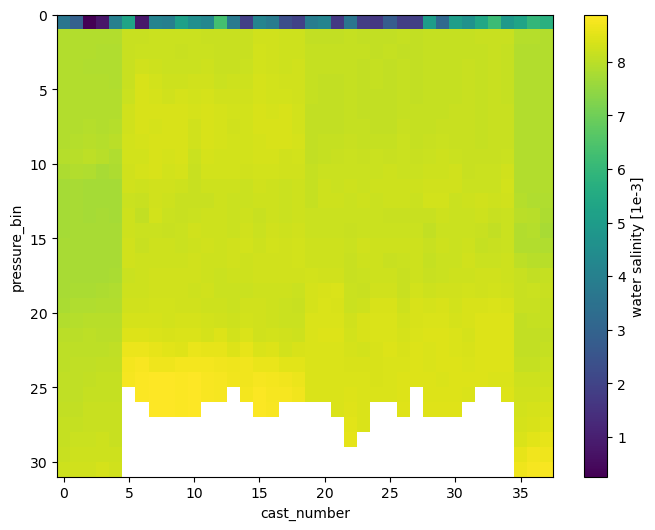

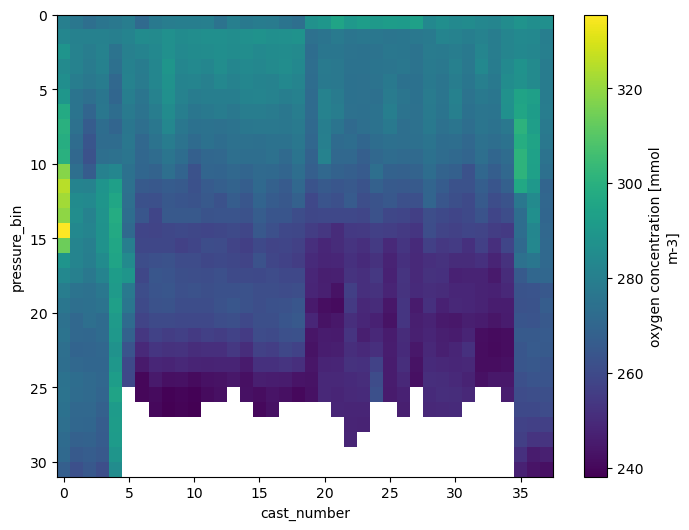

In [8]:
for var in list(ds):
    if var in  ['latitude', 'longitude', 'datetime']:
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    ds[var].plot(ax=ax)
    plt.gca().invert_yaxis()
    plt.savefig(f'figures/ctd/gridded/{var}.png')
    #plt.close('all')

# YUCO

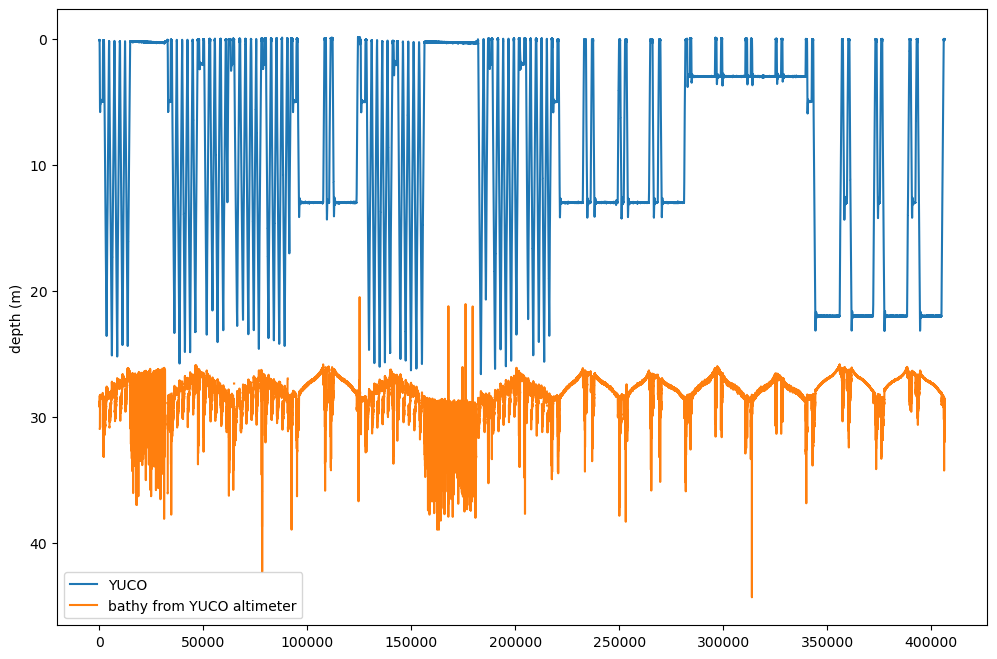

In [9]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(yuco.index, yuco['Depth (m)'], label="YUCO")
ax.plot(yuco.index, yuco['Depth (m)'] +  yuco['Altitude (m)'], label="bathy from YUCO altimeter")
ax.set(ylabel="depth (m)")
ax.legend()
ax.invert_yaxis()

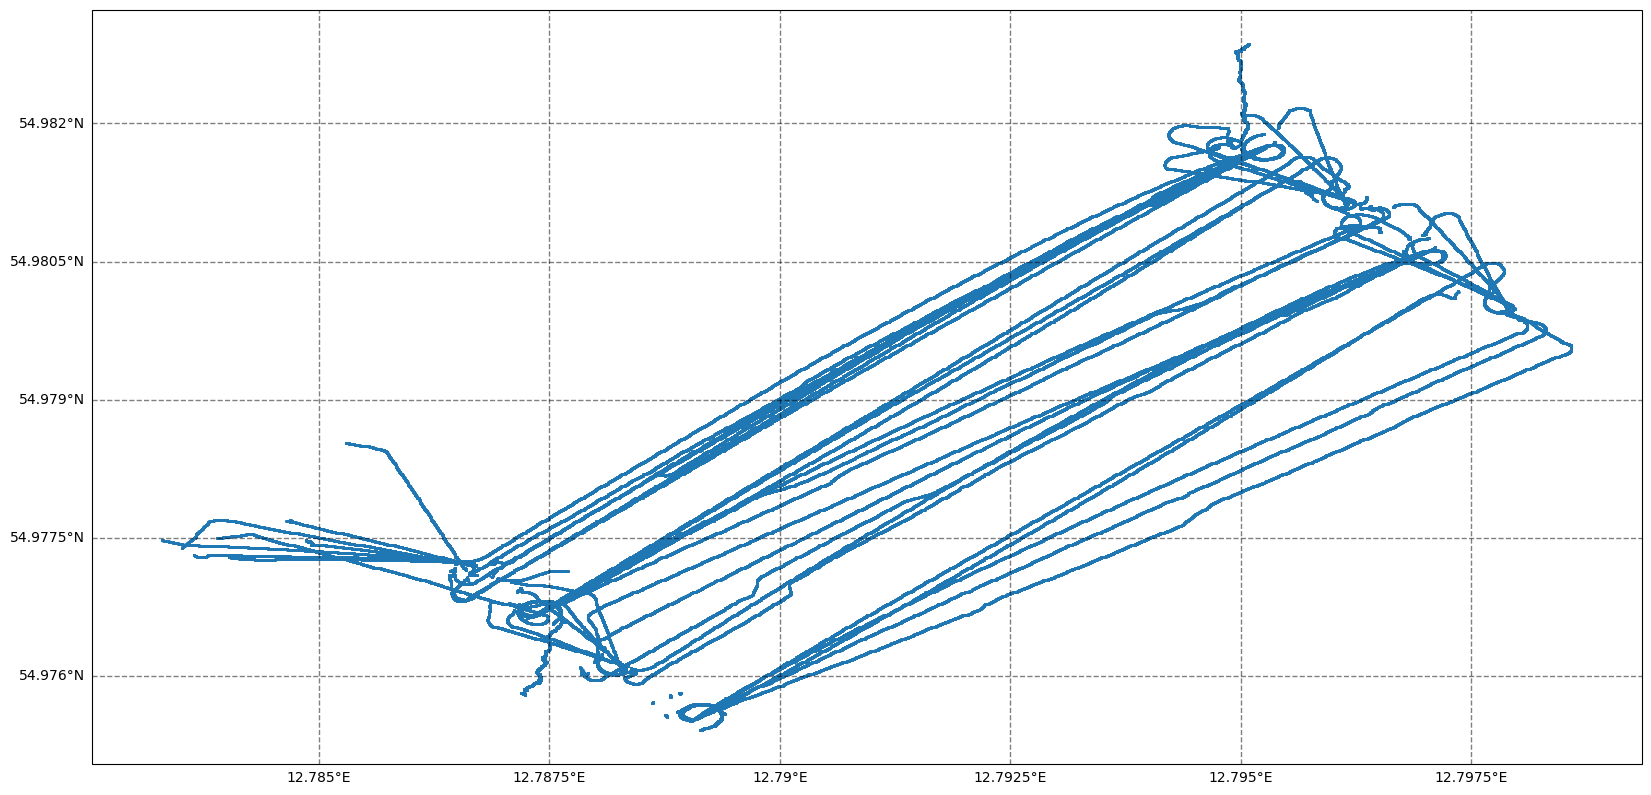

In [10]:
coord = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=coord)
#ax.set_extent([18.78, 18.805, 54.95, 55], crs=coord)
#ax.scatter(sites.lon, sites.lat)
ax.scatter(yuco['INX Longitude (�)'], yuco['INX Latitude (�)'], s=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True

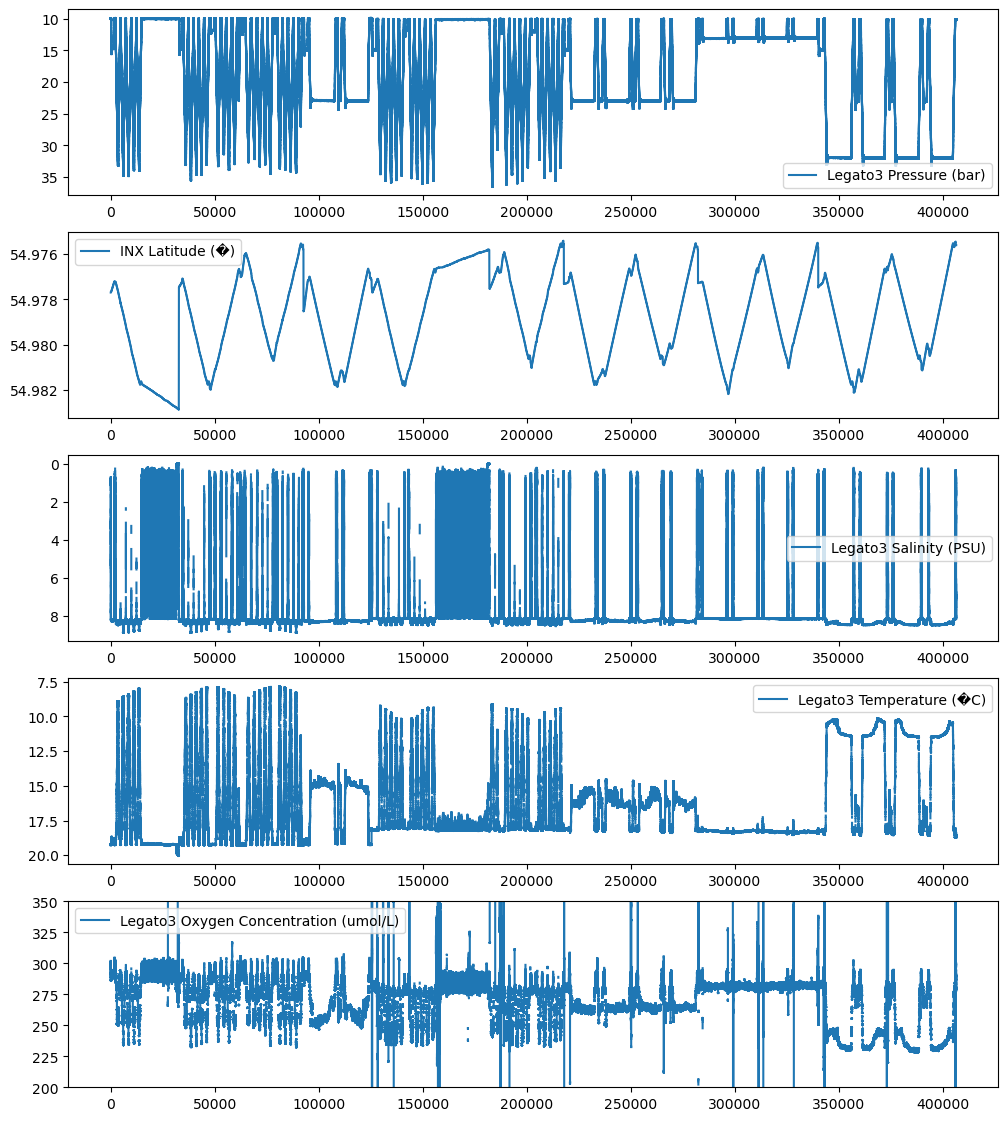

In [11]:
plot_vars =  ['Legato3 Pressure (bar)', 
              'INX Latitude (�)',
 'Legato3 Salinity (PSU)',
 'Legato3 Temperature (�C)',
 'Legato3 Oxygen Concentration (umol/L)',
]
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 14))
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    ax.legend()
    ax.invert_yaxis()
ax.set(ylim=(200, 350));

### Sawtooth example

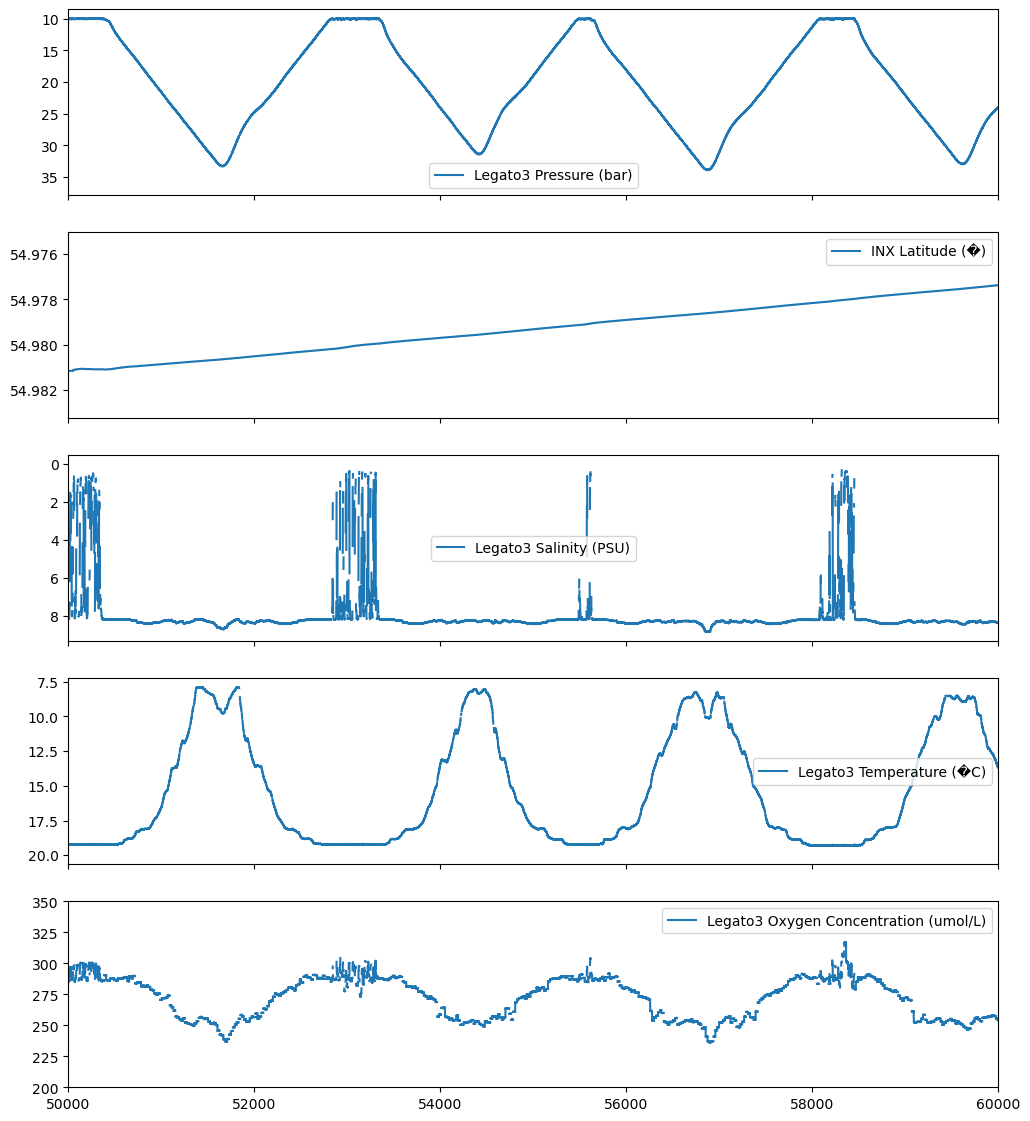

In [12]:
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 14), sharex="col")
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    ax.legend()
    ax.invert_yaxis()
ax.set(ylim=(200, 350), xlim=(50000, 60000));

### Profile at depth example

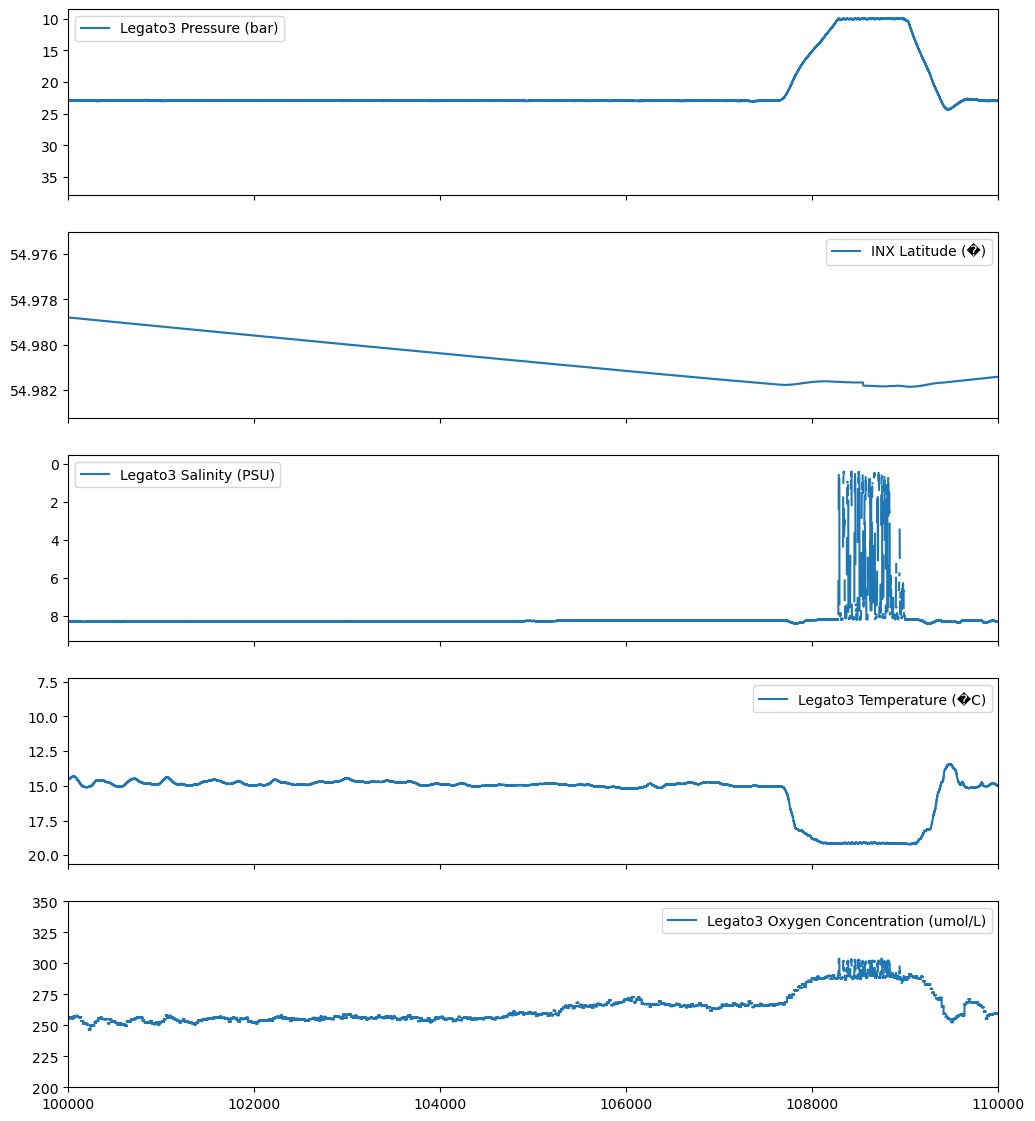

In [13]:
fig, axs = plt.subplots(len(plot_vars), 1, figsize = (12, 14), sharex="col")
axs = axs.ravel()

for i, var in enumerate(plot_vars):
    ax = axs[i]
    ax.plot(yuco.index, yuco[var], label=var)
    ax.legend()
    ax.invert_yaxis()
ax.set(ylim=(200, 350), xlim=(100000, 110000));